In [1]:
#Import the libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

### Question One
Daily energy intake in kJ was measured for 11 women (Altman, 1991):
5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770.
We wish to investigate whether the women’s energy intake deviates
systematically from a recommended value of 7725 kJ. Assuming this
data comes from a normal distribution; use a t-test to test whether the
distribution might have a mean of 7725 kJ. Explain whether a left-tail,
right-tail or two-tailed test is appropriate. Give the sample mean, sample
standard deviation, standard error of the mean (SEM), t statistic, degrees
of freedom and p-value. Finally explain if the null hypothesis is rejected
or not.

In [2]:
#Load the daily intake data into a list and convert it to a numpy array
daily_intake = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])
#Get the size pf the dataset
sample_size = np.size(daily_intake)

In [3]:
#Set the recommended mean value
recommended_mean = 7725
#Use the scipy ttest_1samp function to perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(daily_intake, recommended_mean)

#Compute the mean of the daily intake data
sample_mean = round(np.mean(daily_intake), 2)

#Compute the standard deviation of the daily intake data
sd = round(np.std(daily_intake), 2)

#Compute the standard error of the daily intake data
sem_val = np.std(daily_intake, ddof=1) / np.sqrt(np.size(daily_intake))
sem = round(sem, 2)

#Round off the t-statistic
t_stat = (round(t_statistic, 2))

#Round off the p-value
p_val = (round(p_value, 2))

#Compute the degrees of freedom
df = sample_size - 1

table = [["Mean", sample_mean],["Standard Deviation",sd],["Sample Standard error of mean",sem],["T-Statistic",t_stat],
         ["Degrees of Freedom",df],["P-Value",p_val]]
print(tabulate(table, headers=["Statistic", "Value"]))

NameError: name 'sem' is not defined

**Setting the null and alternative hypotheses:**

H0 (Null Hypothesis): μ = 7725 kJ

HA (Alternative Hypothesis): μ ≠ 7725 kJ

**Stating the significance level:**

α = 0.05

**Determining the approriate test type (left-tail, right-tail or two-tailed test)**

A two-tailed test is appropriate because our alternative hypothesis is testing whether the mean of the sample data provided will not be equal to the ideal mean of 7725 kJ

**Conclusion**

The mean of data provided is 6753.64 kJ, which is significantly greater than the sample mean value of 7725 kJ. Therefore the null hypothesis is rejected because μ ≠ 7725 kJ 

**Or**

According to the t-Distribution table, the t critical value at α = 0.05 and n-1 = 10 degrees of freedom is 1.812. This is not less than our t-statistic value of -2.82. In addition, the p-value of the data provided is 0.02, which is less than our significance level of 0.05 therefore the null hypothesis is rejected

### Question Two 
 A Guinness Overall Enjoyment Score (GOES) was used to test if Guinness served in an Irish pub tastes significantly better than pints served elsewhere around the globe. Pints consumed in Ireland received a mean GOES score of 74, while the average GOES score for Guinness tasted elsewhere was 57. The full results were as follows:

    Location Sample Size Mean Standard Deviation
    Ireland 42 74 7.4
    Elsewhere 61 57 7.1
    
Is this difference of 74 versus 57 significant, or is it simply due to natural, random variation? Use a t-test and explain whether a one-sample, two-sample or paired test is appropriate. Show the steps of calculating the t statistic and explain whether a left-tailed, right-tailed or two-tailed test is required. Give the resulting p-value.

**Setting the null and alternative hypotheses:**

H0 (Null Hypothesis): μ = 74

HA (Alternative Hypothesis): μ < 74

**Stating the significance level:**

α = 0.05

**Determining the approriate test type (one-sample, two-sample or paired test)**

**Determining the approriate test type (left-tail, right-tail or two-tailed test)**

A lower-tailed test is appropriate because our alternative hypothesis is testing whether the mean GOES score from anywhere else in the globe will be less than that of the GOES score in Ireland, which is 74

**Conclusion**

The mean of data provided is 6753.64 kJ, which is significantly greater than the sample mean value of 7725 kJ. Therefore the null hypothesis is rejected because μ ≠ 7725 kJ 

**Or**

According to the t-Distribution table, the t critical value at α = 0.05 and n-1 = 10 degrees of freedom is 1.812. This is not less than our t-statistic value of -2.82. In addition, the p-value of the data provided is 0.02, which is less than our significance level of 0.05 therefore the null hypothesis is rejected

### Question Three

Use data from the World Bank Indicators for 2013 to study the relationship between Fertility rate, total (births per woman) versus GDP per capita PPP (current international $). Make a carefully labelled graph with one dot per country. Estimate the correlation coefficient and give your interpretation.

In [6]:
#Load the Fertlity Rate and GDP per Capita data from the dowloaded files
fertility_data = pd.read_csv('Fertility_Rate_Data.csv', skiprows=4)
gdp_data = pd.read_csv('GDP_Per_Capita.csv', skiprows = 4, index_col=1)

In [7]:
#Load the fertility rate data from 2013 into a separate new dataframe
fertility_data_filtered = fertility_data[["2013"]]
#Load the GDP per Capita data from 2013 into a separate new dataframe
gdp_data_filtered = gdp_data[["2013"]]

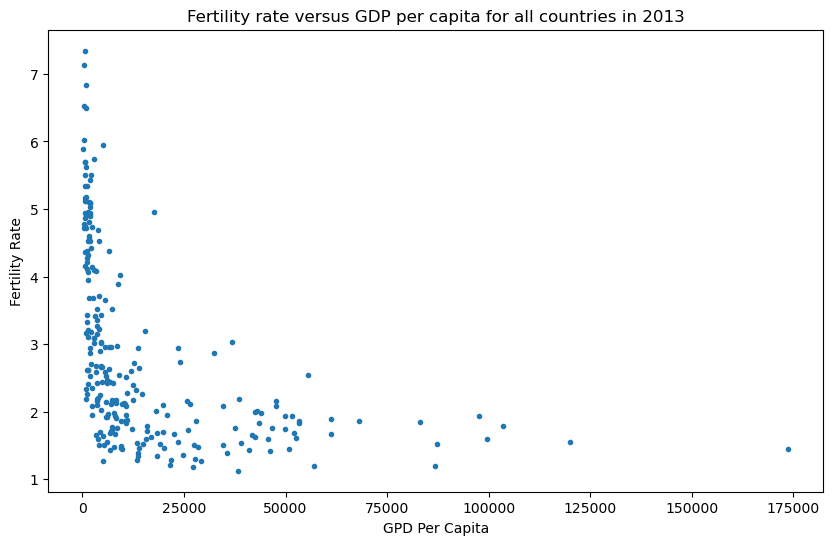

In [8]:
#Plot a scatterplot of Fertility rate versus GDP per capita for all countries in 2010
plt.figure(figsize = (10,6))
plt.title("Fertility rate versus GDP per capita for all countries in 2013")
plt.xlabel("GPD Per Capita")
plt.ylabel("Fertility Rate")
plt.scatter(gdp_data_filtered['2013'], fertility_data_filtered['2013'], marker=".")
plt.show()

In [9]:
fertility_2013 = np.array(fertility_data_filtered['2013'])
gdp_2013 = np.array(gdp_data_filtered['2013'])

In [10]:
gdp_2013 = np.nan_to_num(gdp_2013)
fertility_2013 = np.nan_to_num(fertility_2013)

In [11]:
#Calculate the correlation coefficient between the two datasets
coeffecient = np.corrcoef(gdp_2013, fertility_2013)
coeffecient

array([[ 1.        , -0.44624952],
       [-0.44624952,  1.        ]])

#### Question Four

Load in monthly average house price data in pounds sterling (£) from Jan 1991 to Dec 2016. Download the data from here (choose the file UK monthly indices (Post ‘91)). Graph the time series and label it carefully. Construct the autocorrelation function (ACF) of the monthly returns defined as r(t) = [p(t)/p(t-1)]-1 and show the values for lags of one up to 20 using a bar-graph. Indicate the values of the ACF using horizontal lines that would correspond to a statistically significant result at p<0.05.
From the ACF of monthly data is there evidence of seasonality? Is there a trend in the time series? What is the annualized return over this period as a percentage?

In [12]:
#Load the housing price data data and metadata from the dowloaded files
house_price_data = pd.read_excel('Monthly Average House Price.xls')
house_prices = house_price_data.rename(columns={"Unnamed: 0":"Date"})
house_prices.head()

,Date,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
0,1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1,1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
2,1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
3,1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
4,1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN


In [13]:
#Set the Date column as the index
house_prices = house_prices.set_index('Date')
house_prices.head()

,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
Date,,,,,,
1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN


In [25]:
#Select the data from Jan 1991 to Dec 2016
mask = (house_prices.index>='1991-01-01') & (house_prices.index<='2016-12-31')
house_prices_filtered = house_prices.loc[mask]
house_prices_filtered.tail()

,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
Date,,,,,,
2016-08-01,206144.961815,411.237157,409.465432,0.007744,0.055643,0.009269
2016-09-01,206014.691677,410.977282,410.292238,0.002019,0.053326,0.010542
2016-10-01,205904.191651,410.756846,410.256066,-0.000088,0.046223,0.011086
2016-11-01,204947.430028,408.848209,410.018088,-0.000580,0.044025,0.008036
2016-12-01,205897.846011,410.744187,412.912278,0.007059,0.045171,0.005799


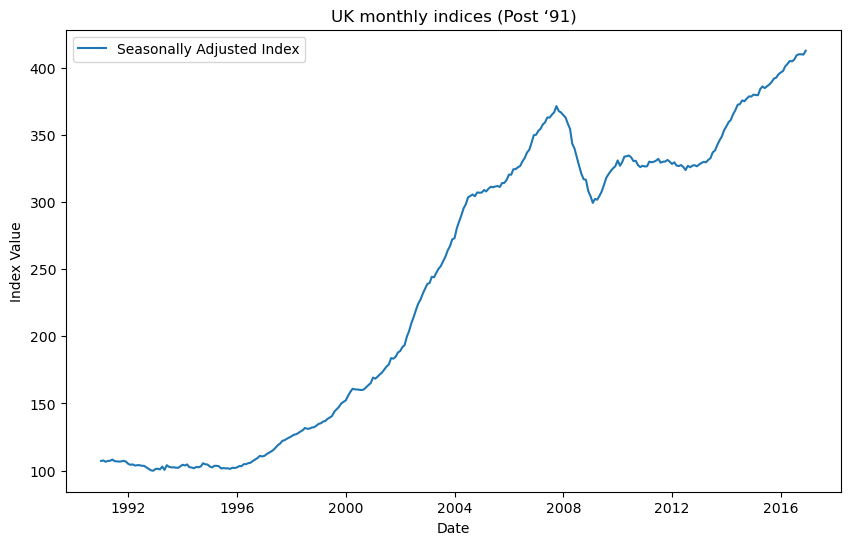

In [28]:
#Plot a time-series of the UK monthly indices (Post ‘91)
plt.figure(figsize = (10,6))
plt.title("UK monthly indices (Post ‘91)")
plt.xlabel("Date")
plt.ylabel("Index Value")
#plt.plot(house_prices_filtered.index, house_prices_filtered["INDEX Q1 1993=100"], label="INDEX Q1 1993=100")
plt.plot(house_prices_filtered.index, house_prices_filtered["Seasonally Adjusted Index"], label="Seasonally Adjusted Index")
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Constructing the autocorrelation function (ACF) of the monthly returns
#defined as r(t) = [p(t)/p(t-1)]-1